# `Problem Statement:`

1. Download ‘Automobile’ dataset from the UCI ML repository
(https://archive.ics.uci.edu/dataset/10/automobile)
2. Create five (5) different data visualizations to explore datasets.
3. Describe then in What/How/Why framework, highlight your findings.


# `Steps involved in the Solution`

## 1. Importing
- Import necessary libraries
- Load the dataset

## 2. Preprocessing Steps
- Renaming the columns
- Check the datatypes for Data type conversions
- Dropping the duplicate rows
- Handling Nan or missing values
- Removing outliers

## 3. Exploratory Data Analysis (EDA)
- General dataset overview (e.g., `df.info()`, `df.describe()`)

## 4. Visualization

### 4.1. Univariate Plots
- Histograms and Density plots
- Bar Chart with Count Plot

### 4.2. Bivariate Plots
- Line Plots

### 4.3 Combination of Univariate Bivariate Distributions
- Bar and Line chart

### 4.4. Scatter/Bar Plots
- Relationships between specific features

### 4.5. Multivariate Plots
- Correlation Heatmap
- Visualizing correlations between features



## `1. Importing the necessary libraries and dataset`





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors",
           "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width",
           "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg",
           "highway_mpg", "price"]

df = pd.read_csv(url, names=columns)
df.head(10)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


## `Renaming the columns`

In [3]:
rename_cols = {
    "symboling": "RiskRating",
    "normalized_losses": "NormalizedLosses",
    "make": "Manufacturer",
    "fuel_type": "FuelType",
    "aspiration": "Aspiration",
    "num_doors": "DoorCount",
    "body_style": "BodyStyle",
    "drive_wheels": "DriveType",
    "engine_location": "EngineLocation",
    "wheel_base": "WheelBase",
    "length": "Length",
    "width": "Width",
    "height": "Height",
    "curb_weight": "CurbWeight",
    "engine_type": "EngineType",
    "num_cylinders": "CylinderCount",
    "engine_size": "EngineSize",
    "fuel_system": "FuelSystem",
    "bore": "Bore",
    "stroke": "Stroke",
    "compression_ratio": "CompressionRatio",
    "horsepower": "Horsepower",
    "peak_rpm": "PeakRPM",
    "city_mpg": "CityMPG",
    "highway_mpg": "HighwayMPG",
    "price": "Price"
}

# Apply the renaming
df = df.rename(columns=rename_cols)

# Verify the renaming
print(df.columns)


Index(['RiskRating', 'NormalizedLosses', 'Manufacturer', 'FuelType',
       'Aspiration', 'DoorCount', 'BodyStyle', 'DriveType', 'EngineLocation',
       'WheelBase', 'Length', 'Width', 'Height', 'CurbWeight', 'EngineType',
       'CylinderCount', 'EngineSize', 'FuelSystem', 'Bore', 'Stroke',
       'CompressionRatio', 'Horsepower', 'PeakRPM', 'CityMPG', 'HighwayMPG',
       'Price'],
      dtype='object')


Now we observe each feature present in the dataset.<br>

`RiskRating:` Indicates the risk rating associated with the vehicle (based on insurance or manufacturer assessment).<br>
`NormalizedLosses:` Normalized loss values related to insurance claims for the vehicle.<br>
`Manufacturer:` The brand or company that manufactures the vehicle.<br>
`FuelType:` The type of fuel used by the vehicle, e.g., gasoline, diesel.<br>
`Aspiration:` Defines whether the engine is naturally aspirated or uses turbocharging/supercharging.<br>
`DoorCount:` The number of doors the vehicle has.<br>
`BodyStyle:` Describes the style of the vehicle, such as sedan, hatchback, or SUV.<br>
`DriveType:` Indicates the drive type of the vehicle, such as front-wheel drive (FWD), rear-wheel drive (RWD), or all-wheel drive (AWD).<br>
`EngineLocation:` Specifies the location of the engine (e.g., front or rear).<br>
`WheelBase:` The distance between the front and rear wheels, which affects stability and space.<br>
`Length:` The length of the vehicle from front to back.<br>
`Width:` The width of the vehicle.<br>
`Height:` The height of the vehicle.<br>
`CurbWeight:` The total weight of the vehicle without passengers or cargo.<br>
`EngineType:` The type of engine used, such as inline, V-type, or rotary.<br>
`CylinderCount:` The number of cylinders in the engine.<br>
`EngineSize:` The displacement or size of the engine, usually in cubic centimeters (cc) or liters.<br>
`FuelSystem:` Describes the fuel system used, such as MPFI (Multi-Point Fuel Injection) or carburetor.<br>
`Bore:` The diameter of each cylinder in the engine.<br>
`Stroke:` The distance traveled by the piston within the cylinder.<br>
`CompressionRatio:` The ratio of the engine's total volume to the combustion chamber volume when the piston is at the top.<br>
`Horsepower:` The power output of the engine, typically measured in HP.<br>
`PeakRPM:` The maximum revolutions per minute (RPM) the engine achieves.<br>
`CityMPG:` The fuel efficiency of the vehicle when driving in city conditions, with frequent stops and starts.<br>
`HighwayMPG:` The fuel efficiency when driving on highways at consistent speeds.<br>
`Price:` The market price of the vehicle in dollars.<br>

## `Check the datatypes`

In [4]:
column_datatypes = df.dtypes
column_records = df.count()

print("Data Types:")
print(column_datatypes)

Data Types:
RiskRating            int64
NormalizedLosses     object
Manufacturer         object
FuelType             object
Aspiration           object
DoorCount            object
BodyStyle            object
DriveType            object
EngineLocation       object
WheelBase           float64
Length              float64
Width               float64
Height              float64
CurbWeight            int64
EngineType           object
CylinderCount        object
EngineSize            int64
FuelSystem           object
Bore                 object
Stroke               object
CompressionRatio    float64
Horsepower           object
PeakRPM              object
CityMPG               int64
HighwayMPG            int64
Price                object
dtype: object


In [5]:
# Convert data types based on the information provided
df['NormalizedLosses'] = pd.to_numeric(df['NormalizedLosses'], errors='coerce')  # Convert to float64 (NaNs if errors)
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')  # Convert to float64 (NaNs if errors)
df['PeakRPM'] = pd.to_numeric(df['PeakRPM'], errors='coerce')  # Convert to float64 (NaNs if errors)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to float64 (NaNs if errors)

# Display the updated data types
print(df.dtypes)

RiskRating            int64
NormalizedLosses    float64
Manufacturer         object
FuelType             object
Aspiration           object
DoorCount            object
BodyStyle            object
DriveType            object
EngineLocation       object
WheelBase           float64
Length              float64
Width               float64
Height              float64
CurbWeight            int64
EngineType           object
CylinderCount        object
EngineSize            int64
FuelSystem           object
Bore                 object
Stroke               object
CompressionRatio    float64
Horsepower          float64
PeakRPM             float64
CityMPG               int64
HighwayMPG            int64
Price               float64
dtype: object


## `Dropping the duplicate rows`

In [6]:
# Count the number of duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## `Dropping the null or missing values`

In [7]:
# check for nan values in each columns
nan_counts = df.isnull().sum()
print(nan_counts)

RiskRating           0
NormalizedLosses    41
Manufacturer         0
FuelType             0
Aspiration           0
DoorCount            0
BodyStyle            0
DriveType            0
EngineLocation       0
WheelBase            0
Length               0
Width                0
Height               0
CurbWeight           0
EngineType           0
CylinderCount        0
EngineSize           0
FuelSystem           0
Bore                 0
Stroke               0
CompressionRatio     0
Horsepower           2
PeakRPM              2
CityMPG              0
HighwayMPG           0
Price                4
dtype: int64


Having 41 missing values out of 205 is quite a lot, and it's nearly 20% of the data in that column. If we tried to fill those in with the mean, zero, or some other value, it would feel like we’re just guessing, which could mess up the overall analysis causing inaccuracies. It’s like trying to fill in the blanks without enough context—it might lead to misleading insights.

Instead of taking that risk, it's much safer to drop the column, especially if it's not going to be a game-changer for your analysis. This way, you keep the integrity of your dataset intact. It’s all about making sure the data you have is reliable and not artificially inflated with estimates.

In [8]:
# Drop the 'NormalizedLosses' column
df = df.drop(columns=['NormalizedLosses'])

df.head()

,RiskRating,Manufacturer,FuelType,Aspiration,DoorCount,BodyStyle,DriveType,EngineLocation,WheelBase,Length,...,EngineSize,FuelSystem,Bore,Stroke,CompressionRatio,Horsepower,PeakRPM,CityMPG,HighwayMPG,Price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
nan_counts = df.isnull().sum()
print(nan_counts)


RiskRating          0
Manufacturer        0
FuelType            0
Aspiration          0
DoorCount           0
BodyStyle           0
DriveType           0
EngineLocation      0
WheelBase           0
Length              0
Width               0
Height              0
CurbWeight          0
EngineType          0
CylinderCount       0
EngineSize          0
FuelSystem          0
Bore                0
Stroke              0
CompressionRatio    0
Horsepower          2
PeakRPM             2
CityMPG             0
HighwayMPG          0
Price               4
dtype: int64


In [10]:
# Drop rows where any of the specified columns have null values
columns_to_check = ['Bore', 'Stroke', 'Horsepower', 'PeakRPM', 'Price']
df = df.dropna(subset=columns_to_check)

# Verify that there are no more null values in those columns
print(df.isnull().sum())

RiskRating          0
Manufacturer        0
FuelType            0
Aspiration          0
DoorCount           0
BodyStyle           0
DriveType           0
EngineLocation      0
WheelBase           0
Length              0
Width               0
Height              0
CurbWeight          0
EngineType          0
CylinderCount       0
EngineSize          0
FuelSystem          0
Bore                0
Stroke              0
CompressionRatio    0
Horsepower          0
PeakRPM             0
CityMPG             0
HighwayMPG          0
Price               0
dtype: int64


## `Removing outliers`

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

## **`Outliers removal techniques - IQR Method`**


IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)

In [11]:
# Select only numeric columns for quantile calculation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1, Q3, and IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outlier_mask = False

for col in numeric_cols:
    outlier_mask |= (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])

# Count the number of outliers
outlier_indices = df[outlier_mask].index.tolist()
num_outliers = len(outlier_indices)

# Limit the number of outliers to remove
max_outliers_to_remove = 5

if num_outliers > max_outliers_to_remove:
    outlier_indices_to_remove = outlier_indices[:max_outliers_to_remove]
else:
    outlier_indices_to_remove = outlier_indices

# Remove the specified outliers from the DataFrame
df_cleaned = df.drop(index=outlier_indices_to_remove)

# Display the shape of the original and cleaned DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# Optionally, reset the index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df_cleaned.head())


Original DataFrame shape: (199, 25)
Cleaned DataFrame shape: (194, 25)
   RiskRating Manufacturer FuelType Aspiration DoorCount    BodyStyle  \
0           3  alfa-romero      gas        std       two  convertible   
1           3  alfa-romero      gas        std       two  convertible   
2           1  alfa-romero      gas        std       two    hatchback   
3           2         audi      gas        std      four        sedan   
4           2         audi      gas        std      four        sedan   

  DriveType EngineLocation  WheelBase  Length  ...  EngineSize  FuelSystem  \
0       rwd          front       88.6   168.8  ...         130        mpfi   
1       rwd          front       88.6   168.8  ...         130        mpfi   
2       rwd          front       94.5   171.2  ...         152        mpfi   
3       fwd          front       99.8   176.6  ...         109        mpfi   
4       4wd          front       99.4   176.6  ...         136        mpfi   

   Bore Stroke Compre

We got 194 records as cleaned Dataset after Preprocessing

#EDA and Visualization

`df.describe()` is a  handy method in pandas that gives you a quick summary of the statistical characteristics of your dataset, specifically for numerical columns. It’s like a quick snapshot of the data's distribution, of count, mean, standarad distribution, minimum , Q1, median, Q3 & maximimum

In [12]:
#Describe statistics of df
df_stats = df_cleaned.describe()
df_stats

,RiskRating,WheelBase,Length,Width,Height,CurbWeight,EngineSize,CompressionRatio,Horsepower,PeakRPM,CityMPG,HighwayMPG,Price
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.845361,98.668041,173.686598,65.781443,53.735567,2542.041237,125.860825,10.228454,102.329897,5108.762887,25.402062,30.886598,12901.355670
std,1.270145,6.087029,12.178735,2.015398,2.461817,518.148146,41.431837,4.062006,37.071062,483.430654,6.406214,6.810349,7659.153266
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.025000,52.000000,2145.000000,97.000000,8.600000,70.000000,4800.000000,20.000000,25.000000,7747.250000
50%,1.000000,96.900000,172.800000,65.400000,54.100000,2407.500000,110.000000,9.000000,95.000000,5100.000000,25.000000,30.000000,10221.500000
75%,2.000000,101.200000,180.275000,66.500000,55.500000,2911.500000,141.000000,9.400000,116.000000,5500.000000,30.000000,35.500000,15994.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## `Visualising Univariate Distributions`

### `Histogram & Density Plots`

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

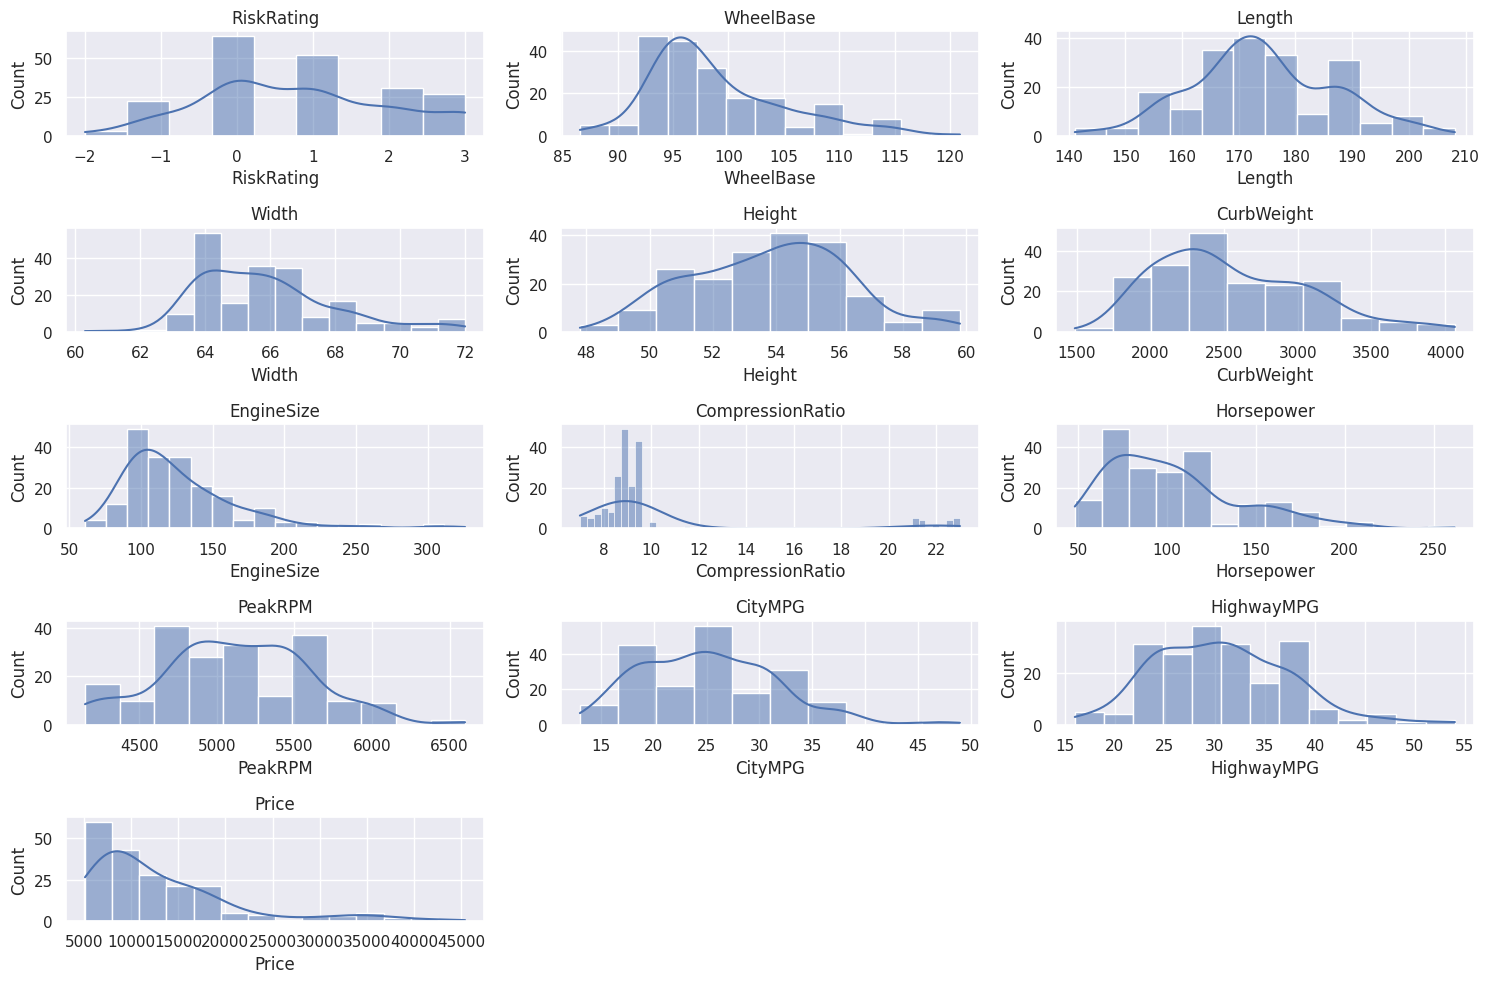

In [13]:
# storing columns as list
numeric_columns = df_cleaned.select_dtypes(include=['int', 'float']).columns
l = list(numeric_columns)

plt.figure(figsize=(15, 10))
for i, col in enumerate(l):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


### Observations from the Histogram Density Plots:

1. **Risk Rating**:
   - The data distribution for Risk Rating is roughly uniform with peaks at around `-1`, `0`, and `2`. This could indicate distinct groups or clusters of cars with specific risk profiles.

2. **WheelBase**:
   - Most vehicles have a WheelBase of around `90-110 inches`, with very few outliers. The distribution suggests that most cars in the dataset fall within a similar range of wheelbase lengths, likely representing standard passenger vehicles.

3. **Length**:
   - The length distribution is slightly left-skewed with the majority of vehicles falling between `160-190 inches`. This indicates that most cars are mid-sized, with a few larger and smaller cars as outliers.

4. **Width**:
   - The width distribution is more concentrated, showing that most vehicles have a width between `63-66 inches`. The tight distribution around this range suggests less variation in car width compared to other features.

5. **Height**:
   - The distribution of vehicle heights is fairly symmetric, with most vehicles falling between `52-56 inches` in height. The distribution suggests a normal pattern, indicating most cars are of average height, with fewer very tall or very short vehicles.

6. **Curb Weight**:
   - The data shows a right-skewed distribution, with most vehicles falling between `2000-3000 lbs`. This suggests a dominance of moderately heavy vehicles with fewer lighter or heavier cars.

7. **Engine Size**:
   - Engine size is positively skewed, with most engines falling within `100-150 cubic inches`. There are fewer vehicles with larger engine sizes, indicating that the dataset contains more cars with moderate-sized engines.

8. **Compression Ratio**:
   - The compression ratio distribution shows a peak around `9-10`, with some distinct smaller peaks at higher values. This could reflect different engine types or tuning settings for performance or efficiency.

9. **Horsepower**:
   - Horsepower distribution is positively skewed, with most cars having between `70-150 HP`. The tail on the right-hand side represents high-performance cars with greater horsepower.

10. **Peak RPM**:
    - The distribution of Peak RPM is centered around `5000-5500`, with fewer cars having lower or higher RPMs. This suggests that most vehicles in the dataset have engines optimized to operate within a relatively standard RPM range.

11. **City MPG**:
    - The City MPG distribution is left-skewed, with most cars offering between `20-30 MPG`. The tail of the distribution includes cars with higher fuel efficiency, but they are fewer in number.

12. **Highway MPG**:
    - The data shows a left-skewed distribution, with the majority of cars offering between `25-35 MPG` on the highway. Cars with extremely high highway MPG (`>40`) are much less common.

13. **Price**:
    - The price distribution is positively skewed, with most cars priced between `5000-15000`. The few higher-priced vehicles in the tail represent luxury or premium cars.


### `Bar Chart with Count Plot`
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


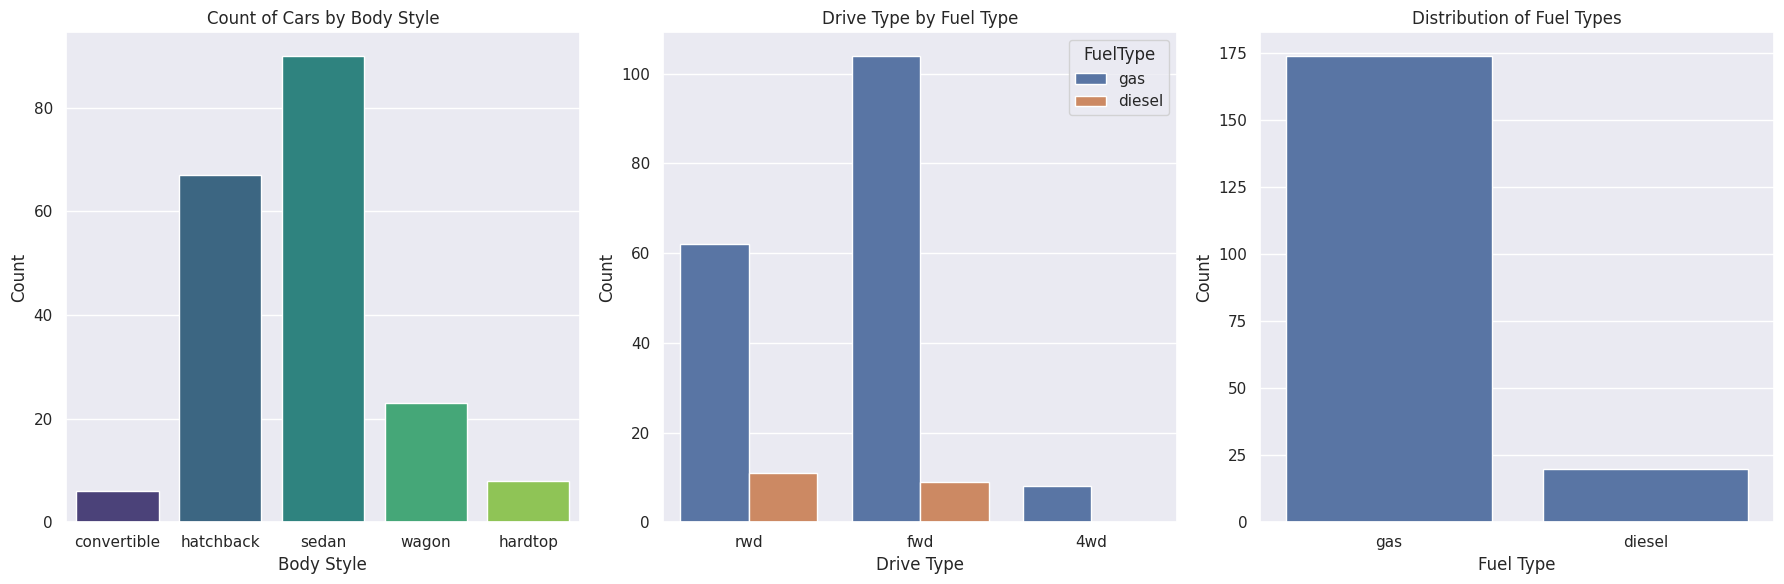

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for subplots

# First subplot: Count of Cars by Body Style
sns.countplot(data=df_cleaned, x='BodyStyle', palette='viridis', ax=axs[0])
axs[0].set_title('Count of Cars by Body Style')
axs[0].set_xlabel('Body Style')
axs[0].set_ylabel('Count')

# Second subplot: Count Plot of Drive Type with Fuel Type
sns.countplot(data=df_cleaned, x='DriveType', hue='FuelType', ax=axs[1])  # Using 'FuelType' as hue
axs[1].set_title('Drive Type by Fuel Type')
axs[1].set_xlabel('Drive Type')
axs[1].set_ylabel('Count')

# Third subplot: Distribution of Fuel Types
sns.countplot(x='FuelType', data=df_cleaned, ax=axs[2])
axs[2].set_title('Distribution of Fuel Types')
axs[2].set_xlabel('Fuel Type')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


### **`Observation:`**
 .
<br>
1.Count of Cars by Body Style:

The majority of cars in the dataset fall under the "sedan" category, followed by "hatchback" cars. There are relatively fewer "convertible" and "hardtop" cars. This indicates that the dataset is heavily skewed towards more traditional and practical body styles like sedans and hatchbacks, which are likely favored for their everyday utility.
<br>
2. Drive Type by Fuel Type:

The plot shows that "rwd" (rear-wheel drive) cars dominate the dataset, especially those using gasoline. There are very few cars with "fwd" (front-wheel drive) or "4wd" (four-wheel drive), with diesel cars being a minority in all drive types. This suggests that rear-wheel drive cars, especially those powered by gasoline, are more common in this dataset.
<br>
3. Distribution of Fuel Types:

The majority of cars run on gasoline, with only a small fraction being diesel-powered. This aligns with general market trends, where gasoline-powered vehicles are more common, though diesel is often used for specific vehicle types like trucks or for fuel efficiency in certain regions.


# `Bivariate Distributions`


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




## `Line Plots`

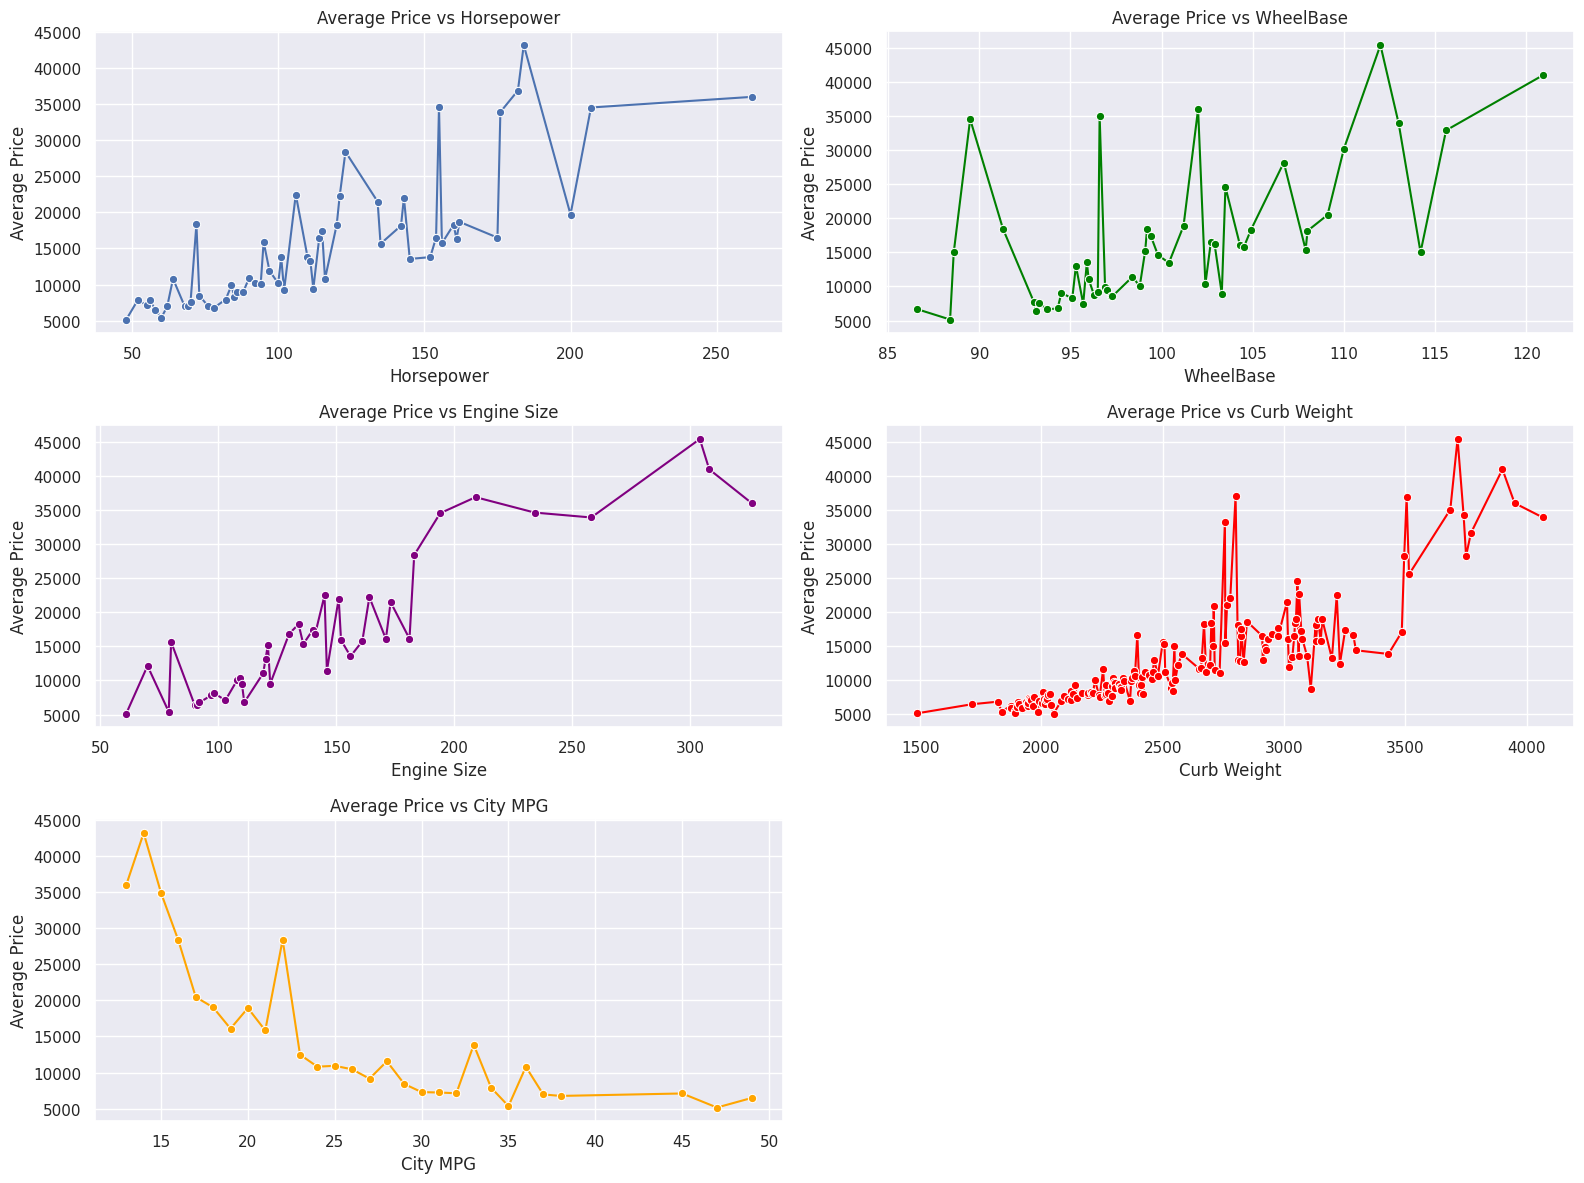

In [15]:
# Storing all numeric columns in a list
numeric_columns = ['Horsepower', 'WheelBase', 'EngineSize', 'CurbWeight', 'CityMPG']

# Creating a figure and subplots for each numeric column vs. Price
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4)  # Adjust space between plots

# Plot 1: Horsepower vs Price
avg_price_horsepower = df_cleaned.groupby('Horsepower')['Price'].mean().reset_index()
sns.lineplot(data=avg_price_horsepower, x='Horsepower', y='Price', marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Average Price vs Horsepower')
axs[0, 0].set_xlabel('Horsepower')
axs[0, 0].set_ylabel('Average Price')

# Plot 2: WheelBase vs Price
avg_price_wheelbase = df_cleaned.groupby('WheelBase')['Price'].mean().reset_index()
sns.lineplot(data=avg_price_wheelbase, x='WheelBase', y='Price', marker='o', color='green', ax=axs[0, 1])
axs[0, 1].set_title('Average Price vs WheelBase')
axs[0, 1].set_xlabel('WheelBase')
axs[0, 1].set_ylabel('Average Price')

# Plot 3: EngineSize vs Price
avg_price_enginesize = df_cleaned.groupby('EngineSize')['Price'].mean().reset_index()
sns.lineplot(data=avg_price_enginesize, x='EngineSize', y='Price', marker='o', color='purple', ax=axs[1, 0])
axs[1, 0].set_title('Average Price vs Engine Size')
axs[1, 0].set_xlabel('Engine Size')
axs[1, 0].set_ylabel('Average Price')

# Plot 4: CurbWeight vs Price
avg_price_curbweight = df_cleaned.groupby('CurbWeight')['Price'].mean().reset_index()
sns.lineplot(data=avg_price_curbweight, x='CurbWeight', y='Price', marker='o', color='red', ax=axs[1, 1])
axs[1, 1].set_title('Average Price vs Curb Weight')
axs[1, 1].set_xlabel('Curb Weight')
axs[1, 1].set_ylabel('Average Price')

# Plot 5: CityMPG vs Price
avg_price_citympg = df_cleaned.groupby('CityMPG')['Price'].mean().reset_index()
sns.lineplot(data=avg_price_citympg, x='CityMPG', y='Price', marker='o', color='orange', ax=axs[2, 0])
axs[2, 0].set_title('Average Price vs City MPG')
axs[2, 0].set_xlabel('City MPG')
axs[2, 0].set_ylabel('Average Price')

# Removing the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()


# Analysis of Line Plots

## 1. Horsepower vs Price
- There is a noticeable **upward trend** in price as the horsepower increases.
- This suggests that cars with higher horsepower tend to be more expensive, which is likely due to the better performance provided by more powerful engines.
- However, there are **fluctuations** in certain ranges, indicating that other features or attributes might also influence the price.

## 2. Wheelbase vs Price
- As the wheelbase increases, there is a **gradual rise** in price.
- Cars with a larger wheelbase (which are usually larger or luxury vehicles) are often associated with a higher price.
- There are **sharp variations** at certain points, which might imply a mix of vehicle types within certain wheelbase ranges.

## 3. Engine Size vs Price
- Similar to horsepower, **engine size** has a positive correlation with car price.
- Larger engines are more expensive due to their performance and capability.
- The trend shows that cars with **bigger engines** command a higher price, with some variability seen in the highest engine sizes.

## 4. Curb Weight vs Price
- Heavier cars tend to be more expensive, reflecting the **luxury** and features found in larger vehicles.
- There is a **steady rise** in price as curb weight increases, with higher curb weight vehicles being associated with **greater durability or features**.

## 5. City MPG vs Price
- Interestingly, cars with **higher fuel efficiency** in city driving (measured by City MPG) tend to be **less expensive**.
- This inverse relationship indicates that more fuel-efficient cars, which often have smaller engines or are designed for efficiency rather than performance, generally cost less.
- The decline in price as City MPG increases may reflect the market’s tendency to price **economical** and **compact** cars lower.

## Key Insights:
- **Power-related attributes** (Horsepower, Engine Size) are positively correlated with price, meaning higher performance vehicles tend to cost more.
- **Fuel efficiency** (City MPG) has an inverse relationship with price, where cars with better city fuel economy tend to be cheaper.
- **Weight and size** (Curb Weight, Wheelbase) also play a significant role, with larger and heavier vehicles being more expensive due to their likely luxury or utility functions.


# `Combination of Univariate Bivariate Distributions`

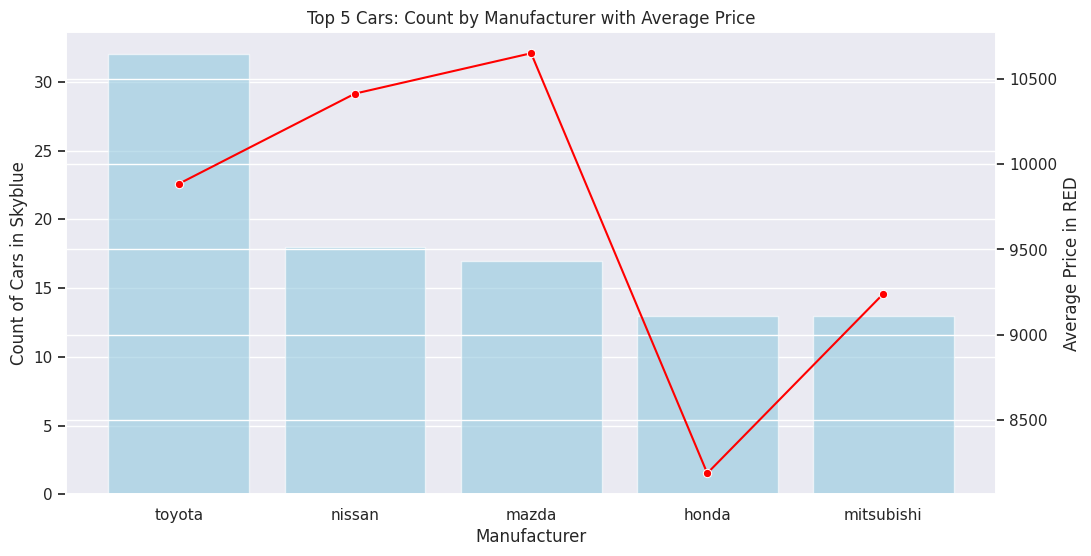

In [16]:

# Group by manufacturer and calculate the count and average price
manufacturer_stats = df_cleaned.groupby('Manufacturer').agg(
    Count=('Price', 'size'),
    Average_Price=('Price', 'mean')
).reset_index()

# Select top 5 manufacturers by count of cars
top_manufacturers = manufacturer_stats.nlargest(5, 'Count')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create axes for the bar and line plots
ax1 = plt.gca()  # Get the current axes
# Create a bar plot for the count of cars by manufacturer
sns.barplot(data=top_manufacturers, x='Manufacturer', y='Count', color='skyblue', alpha=0.6, ax=ax1)

# Overlay a line plot for average price
ax2 = ax1.twinx()  # Create a second y-axis
sns.lineplot(data=top_manufacturers, x='Manufacturer', y='Average_Price', color='red', marker='o', ax=ax2)

# Add titles and labels
plt.title('Top 5 Cars: Count by Manufacturer with Average Price')
plt.xlabel('Manufacturer')

ax1.set_ylabel('Count of Cars in Skyblue')
ax2.set_ylabel('Average Price in RED')

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.show()


### Observations from the Chart: "Top 5 Cars: Count by Manufacturer with Average Price"

1. **Count of Cars (in Skyblue Bars)**:
   - **Toyota** has the highest number of cars, with a count of about 30.
   - **Nissan** and **Mazda** have similar car counts, both around 20.
   - **Honda** and **Mitsubishi** have the lowest number of cars, with counts close to 15 each.

2. **Average Price (in Red Line)**:
   - **Mazda** has the highest average price, exceeding $10,500.
   - **Toyota** comes next, with an average price close to $10,000.
   - **Nissan** has a moderate average price, near $9,800.
   - **Honda** has the lowest average price, below $9,000.
   - **Mitsubishi** also has a relatively low average price, slightly above $9,000.

3. **Inverse Relationship**:
   - **Honda** shows an inverse relationship between the number of cars and average price, with one of the lowest counts and the lowest price.
   - **Mazda** displays the opposite, having one of the lower car counts but the highest average price.

4. **Overall Insights**:
   - Toyota leads in both car count and high price range.
   - Mazda stands out with the highest price, despite a moderate car count.
   - Honda and Mitsubishi are more economical in terms of price, though they also have fewer cars in comparison.

This chart provides a clear visual on how car manufacturers compare in terms of inventory count and pricing strategies, with Mazda being the most expensive and Toyota having the largest number of cars.

## `Scatter Plots`
Scatterplots are used to find the correlation between two continuos variables.




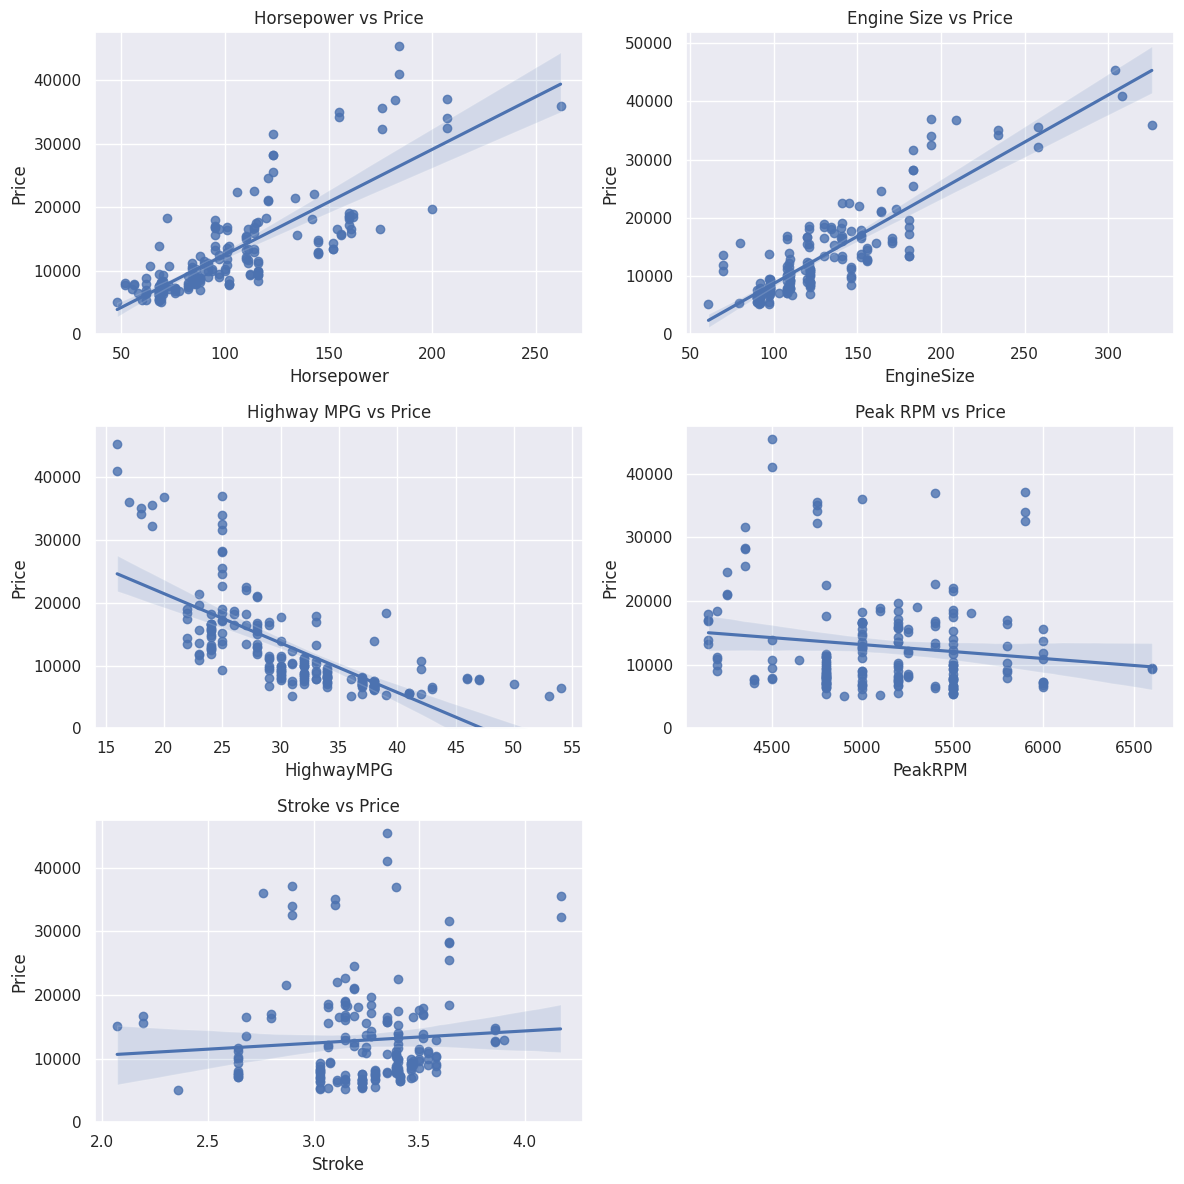

In [17]:
# Convert 'Stroke' column to numeric outside of plotting code
df_cleaned['Stroke'] = pd.to_numeric(df_cleaned['Stroke'], errors='coerce')
df_cleaned['Stroke'].fillna(df_cleaned['Stroke'].mean(), inplace=True)

# Set up the figure
plt.figure(figsize=(12, 12))

# First subplot for Horsepower vs Price
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, first subplot
sns.regplot(x="Horsepower", y="Price", data=df_cleaned)
plt.ylim(0, )
plt.title('Horsepower vs Price')

# Second subplot for Engine Size vs Price
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, second subplot
sns.regplot(x="EngineSize", y="Price", data=df_cleaned)
plt.ylim(0, )
plt.title('Engine Size vs Price')

# Third subplot for Highway MPG vs Price
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, third subplot
sns.regplot(x="HighwayMPG", y="Price", data=df_cleaned)
plt.ylim(0, )
plt.title('Highway MPG vs Price')

# Fourth subplot for Peak RPM vs Price
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, fourth subplot
sns.regplot(x="PeakRPM", y="Price", data=df_cleaned)
plt.ylim(0, )
plt.title('Peak RPM vs Price')

# Fifth subplot for Stroke vs Price
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, fifth subplot
sns.regplot(x="Stroke", y="Price", data=df_cleaned)
plt.ylim(0, )
plt.title('Stroke vs Price')

# Adjust layout
plt.tight_layout()
plt.show()


               Price
Price       1.000000
EngineSize  0.876713
Horsepower  0.802499
Stroke      0.078187
PeakRPM    -0.137932
HighwayMPG -0.700339


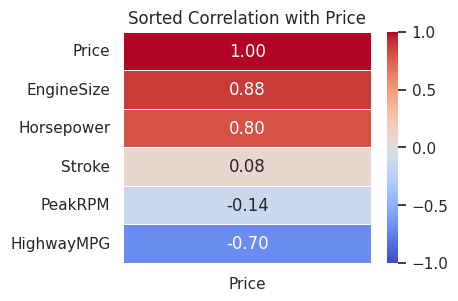

In [18]:
# Create correlation matrix for relevant features including 'Price'
corr_subset = df_cleaned[['Price', 'Horsepower', 'EngineSize', 'HighwayMPG', 'PeakRPM', 'Stroke']].corr()

# Sort the correlation values with respect to 'Price' in descending order
sorted_corr = corr_subset[['Price']].reindex(corr_subset[['Price']].sort_values(by='Price', ascending=False).index)

# Display the sorted correlation matrix
print(sorted_corr)

# Visualize the sorted correlations as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(sorted_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.title('Sorted Correlation with Price')
plt.show()

### Observations aased on the scatterplots and the correlation values:

1. **Engine Size vs. Price**:
   - There is a **strong positive correlation** between engine size and price. The regression line has a steep upward slope, indicating that as the engine size increases, the price also rises.
   - This suggests that vehicles with larger engines are generally associated with higher price points, likely due to the increased performance and power they offer.
   - The correlation coefficient between engine size and price is approximately **0.88**, confirming the strength of this relationship and highlighting engine size as a significant predictor of vehicle price.

2. **Highway MPG vs. Price**:
   - The relationship between highway MPG and price is **negative**, as shown by the downward slope of the regression line. As highway MPG increases, the price tends to decrease.
   - This suggests that vehicles designed for better fuel efficiency (higher MPG) tend to be priced lower, possibly targeting a different market segment focused on cost efficiency and fuel savings.
   - The correlation coefficient is around **-0.70**, indicating a moderately strong inverse relationship, making highway MPG a relevant predictor of vehicle price.

3. **Peak RPM vs. Price**:
   - The scatterplot shows **no significant correlation** between peak RPM and price. The regression line is almost horizontal, and the data points are widely dispersed, indicating a lack of pattern.
   - This variability suggests that peak RPM does not substantially influence vehicle price and is not a reliable predictor for pricing.

4. **Stroke vs. Price**:
   - The scatterplot indicates a **weak and unclear relationship** between stroke and price. The regression line shows minimal slope, and the data points are scattered without a clear trend.
   - The correlation coefficient is only **0.08**, suggesting that stroke is not a meaningful predictor of vehicle price.

5. **Horsepower vs. Price**:
   - Horsepower shows a **strong positive correlation** with price, similar to engine size. As horsepower increases, so does the price, indicating that higher performance (more horsepower) is associated with higher costs.
   - The correlation coefficient is **0.80**, reinforcing that horsepower is a significant predictor for vehicle price.

### Conclusion:
- **Engine size** and **horsepower** are strong predictors of vehicle price, showing a clear positive relationship.
- **Highway MPG** has a moderately strong negative correlation with price, indicating that fuel efficiency impacts pricing inversely.
- **Peak RPM** and **stroke** show weak or no significant correlation with price, suggesting they are not reliable predictors in determining vehicle pricing.

# `Multivariate Plots`



## `Heatmaps`


A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

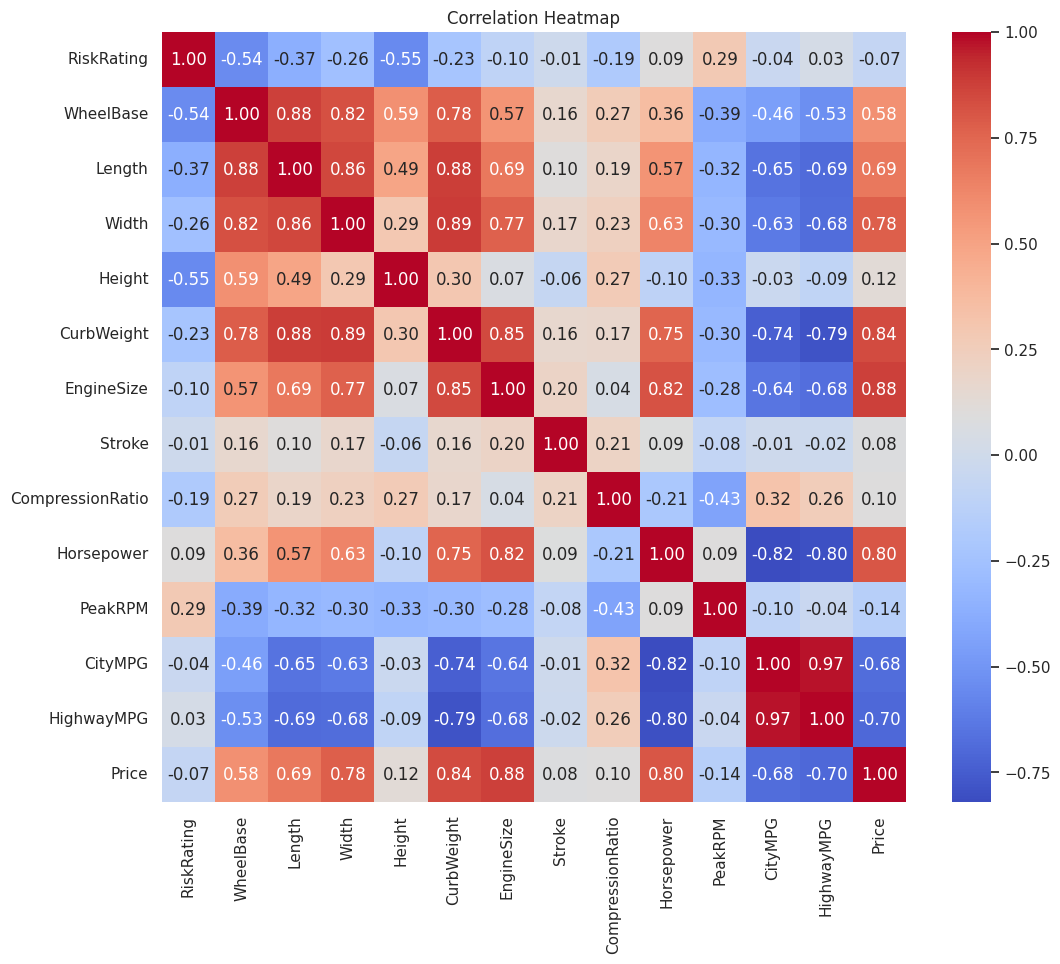

In [19]:
# Compute the correlation matrix only for numeric columns
corr = df_cleaned.select_dtypes(include=np.number).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()

### Analysis and Observations

- **Engine Size and Price**:
  - Engine size shows a **strong positive correlation** with price (**0.88**). This is consistent with the idea that larger engines are associated with higher vehicle prices due to the performance and power they provide.

- **Horsepower and Price**:
  - There is also a **strong positive correlation** between horsepower and price (**0.80**), reinforcing that vehicles with more power tend to cost more, likely due to their appeal to performance-oriented customers.

- **Curb Weight and Price**:
  - Curb weight has a **positive correlation** with price (**0.84**), suggesting that heavier vehicles, which may be associated with luxury or higher build quality, tend to be more expensive.

- **Width and Price**:
  - The width of a vehicle also correlates **strongly and positively** with price (**0.78**), possibly because wider vehicles may offer more interior space and comfort, which are valued features in higher-priced vehicles.

- **Wheelbase and Price**:
  - Wheelbase has a **moderate positive correlation** with price (**0.58**). A longer wheelbase often indicates a larger, more spacious car, which could be linked to higher costs.

- **Length and Price**:
  - Similarly, vehicle length shows a **moderate positive correlation** (**0.69**) with price, indicating that longer cars, which may be perceived as more luxurious or spacious, tend to be more expensive.

- **Highway MPG and Price**:
  - Highway MPG has a **moderate negative correlation** with price (**-0.68**). This suggests that vehicles with better fuel efficiency are often more affordable, which could be due to their design and target market focusing on economy rather than luxury.

- **City MPG and Price**:
  - City MPG shows a similar pattern, with a **negative correlation** (**-0.70**) to price. Vehicles designed for better urban fuel efficiency appear to align with the trend of being less costly.

- **Peak RPM and Price**:
  - Peak RPM displays a **weak negative correlation** (**-0.14**) with price, indicating that it is not a strong determinant of vehicle cost.

- **Stroke and Price**:
  - Stroke has a **minimal positive correlation** (**0.08**) with price, showing that it does not significantly influence pricing.

- **Other Noteworthy Correlations**:
  - **Curb Weight and Engine Size**: These two factors are **highly correlated** (**0.85**), which makes sense as vehicles with larger engines often have higher curb weights.
  - **City MPG and Highway MPG**: These have a **very strong positive correlation** (**0.97**), indicating that vehicles designed for fuel efficiency typically perform well in both urban and highway settings.
  - **Risk Rating and Length**: Interestingly, risk rating shows a **moderate negative correlation** with vehicle length (**-0.37**), potentially hinting that longer vehicles may be perceived as safer.

### Summary
- **Strong Predictors of Price**: Engine size, horsepower, curb weight, and width are the strongest indicators of a vehicle's price.
- **Inverse Relationships with Price**: Highway and city MPG demonstrate a clear negative relationship with price, highlighting that fuel-efficient vehicles tend to be less expensive.
- **Weak or Insignificant Predictors**: Factors like stroke and peak RPM show minimal influence on price, suggesting they are not significant in determining vehicle costs.

